In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score


In [42]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ["sepal_length","sepal_width","petal_width","species"]
iris_data = pd.read_csv(url,names=column_names)

In [44]:
iris_data.head()

,sepal_length,sepal_width,petal_width,species
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa


In [46]:
iris_data.describe()

,sepal_length,sepal_width,petal_width
count,150.000000,150.000000,150.000000
mean,3.054000,3.758667,1.198667
std,0.433594,1.764420,0.763161
min,2.000000,1.000000,0.100000
25%,2.800000,1.600000,0.300000
50%,3.000000,4.350000,1.300000
75%,3.300000,5.100000,1.800000
max,4.400000,6.900000,2.500000


In [48]:
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_width     0
species         0
dtype: int64

In [50]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 5.1 to 5.9
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_width   150 non-null    float64
 3   species       150 non-null    object 
dtypes: float64(3), object(1)
memory usage: 5.9+ KB


In [52]:
iris_data['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

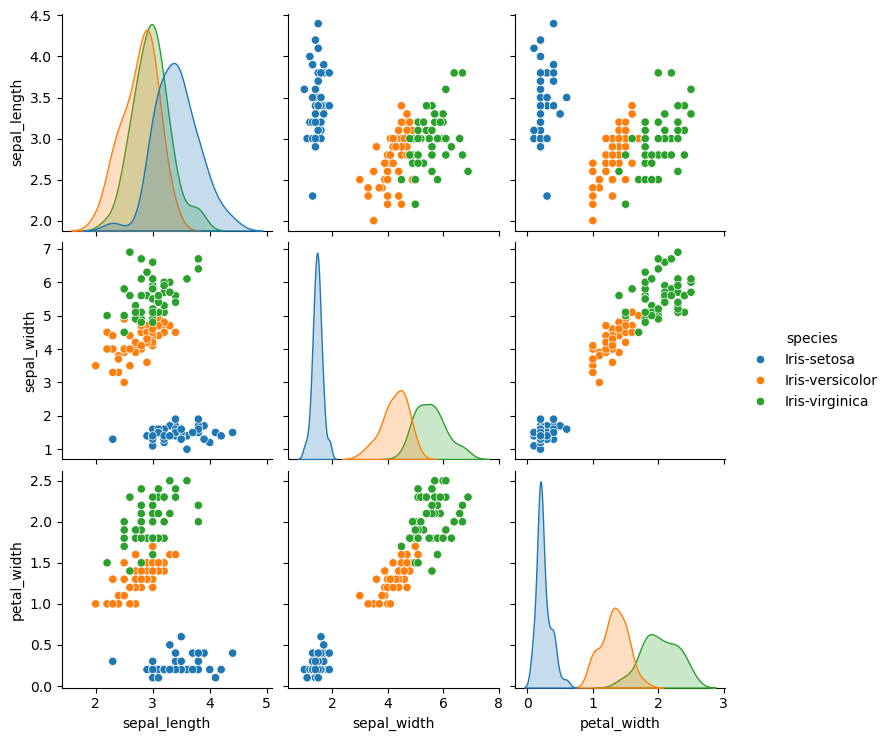

In [54]:
sns.pairplot(iris_data,hue="species")
plt.show()

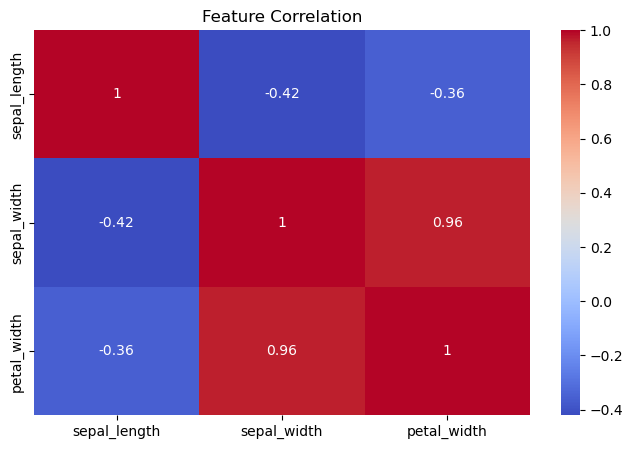

In [58]:

plt.figure(figsize=(8,5))
sns.heatmap(iris_data.drop("species",axis=1).corr(),annot=True,cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()


In [68]:
from sklearn.preprocessing import StandardScaler

X=iris_data.drop("species",axis = 1)
y=iris_data["species"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled[:5])

[[ 1.03205722 -1.3412724  -1.31297673]
 [-0.1249576  -1.3412724  -1.31297673]
 [ 0.33784833 -1.39813811 -1.31297673]
 [ 0.10644536 -1.2844067  -1.31297673]
 [ 1.26346019 -1.3412724  -1.31297673]]


In [72]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

print(y_encoded[:5])

[0 0 0 0 0]


In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

log_reg = LogisticRegression()

log_reg.fit(X_train,y_train)

log_pred = log_reg.predict(X_test)
print("==== Logistic regression Results ====")
print(f"Accuracy: {accuracy_score(y_test,y_pred):.2f}")

print("\nClassification Report:")
print(classification_report(y_test,y_pred,target_names=le.classes_))

print('confusion matrix:')
print(confusion_matrix(y_test,y_pred))
print("================================================================")

==== Logistic regression Results ====
Accuracy: 1.00

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

confusion matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


===== Decision Tree Results =====
Accuracy: 1.00

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


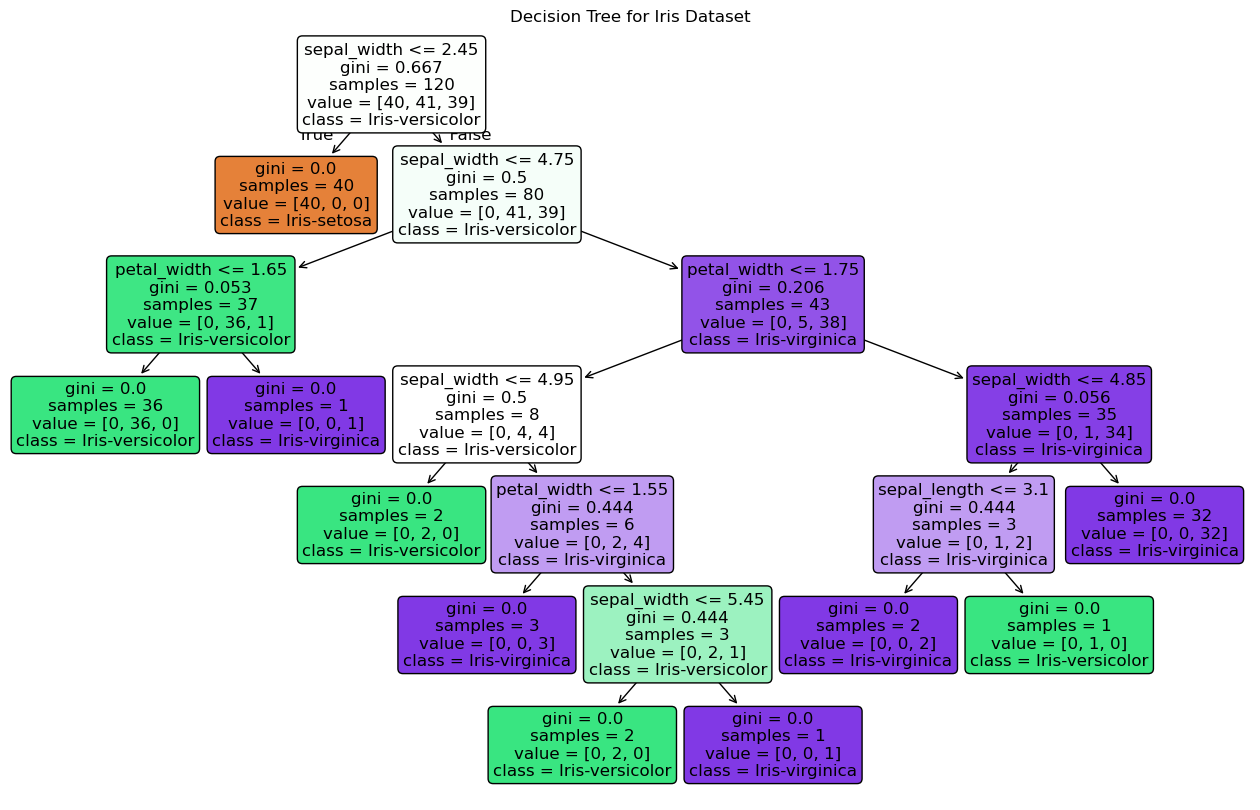

In [96]:


le = LabelEncoder()
iris_data['species_encoded'] = le.fit_transform(iris_data['species'])


X = iris_data.drop(["species", "species_encoded"], axis=1)
y = iris_data['species_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


y_pred_dt = dt_model.predict(X_test)


print("===== Decision Tree Results =====")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt, target_names=le.classes_))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("=================================")


plt.figure(figsize=(16, 10))
plot_tree(dt_model, 
          filled=True, 
          feature_names=X.columns, 
          class_names=le.classes_, 
          rounded=True, 
          fontsize=12)
plt.title("Decision Tree for Iris Dataset")
plt.show()

In [100]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_knn, target_names=le.classes_))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

KNN Accuracy: 1.00
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "K_Nearest Neighbors": KNeighborsClassifier()
}

In [118]:
X=iris_data.drop("species",axis = 1)
y=iris_data["species"]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y_encoded,test_size=0.2,random_state=42)

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

print(f"\n{name} Accuracy: {accuracy_score(y_test, y_pred):2f}")
print("Classification Report:")
print(classification_report(y_test,y_pred,target_names=le.classes_))
print("confusion Matrix:")
print(confusion_matrix(y_test,y_pred))




K_Nearest Neighbors Accuracy: 1.000000
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


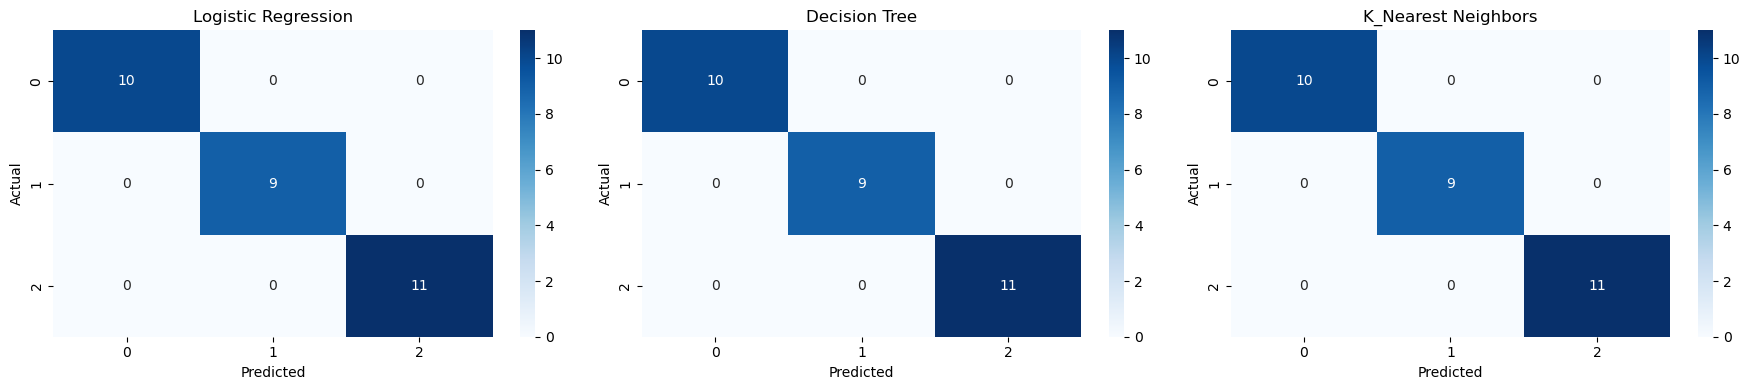

In [114]:
##Visualising confusion metrix

fig, axes = plt.subplots(1, 3, figsize=(18, 4))

for idx, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(name)
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

plt.tight_layout()
plt.show()


Logistic Regression Accuracy: 1.00
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Decision Tree Accuracy: 1.00
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]

C:\Users\DELL\AppData\Local\Temp\ipykernel_2168\2072739919.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracy_results.keys()), y=list(accuracy_results.values()), palette='viridis')


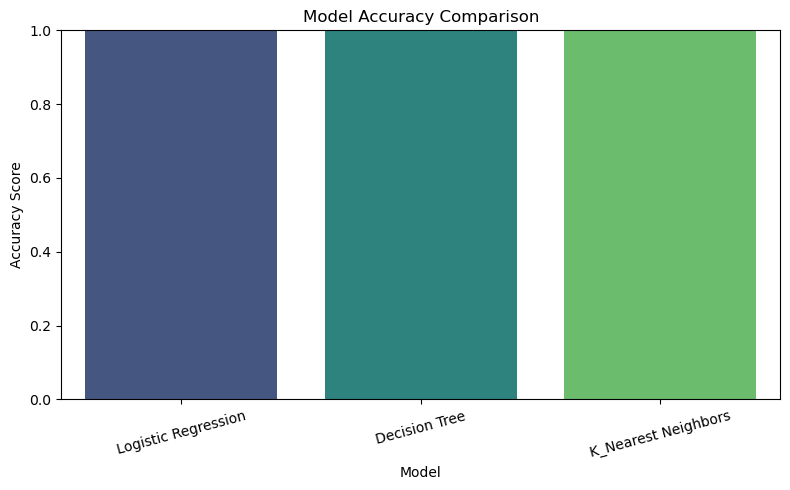

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = iris_data.drop("species", axis=1)
y = iris_data["species"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)


accuracy_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    accuracy_results[name] = acc

    print(f"\n{name} Accuracy: {acc:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


plt.figure(figsize=(8, 5))
sns.barplot(x=list(accuracy_results.keys()), y=list(accuracy_results.values()), palette='viridis')
plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy Score")
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()